In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [111]:
def draw_plot(data, i, j, titl):
    for k in range(2, data.shape[1]):
        plt.plot(data.iloc[i:j, 0], data.iloc[i:j, k])
#         plt.plot(data['NumVert'][i:j], data['Bellman-Ford'][i:j])
#         plt.plot(data['NumVert'][i:j], data['Johnson'][i:j])
#         plt.plot(data['NumVert'][i:j], data['Floyd-Warshall'][i:j])
#     plt.plot(data['NumVert'][i:j], data['Seidel'][i:j])
    plt.grid()
    plt.xlabel('NumVert')
    plt.ylabel('Time')
    plt.legend(list(data.columns)[2:])
    plt.title(titl)
    # plt.scatter(data['NumVert'], data['DFS'])
    # plt.scatter(data['NumVert'], data['Rand'])
    return
   
def plot_dens(ax):
    ax, fig = plt.subplots(2,2)
    
def draw_results(data):
    dens_list = ['M=N', 'M=2N', 'M=8N', 'M=(N/2)^2']
    indexes = data.loc[data['NumVert'] == data['NumVert'][0]].index
    indexes = list(indexes)
    indexes.append(data.shape[0])
    
#     for i in range(len(dens_list)):
#         draw_plot(data, indexes[i],indexes[i+1], dens_list[i])
    
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    draw_plot(data, indexes[0],indexes[0+1], dens_list[0])
    plt.subplot(222)
    draw_plot(data, indexes[1],indexes[1+1], dens_list[1])
    plt.subplot(223)
    draw_plot(data, indexes[2],indexes[2+1], dens_list[2])
    plt.subplot(224)
    draw_plot(data, indexes[3],indexes[3+1], dens_list[3])
        
    plt.show()    

## Лабораторная работа №2. 
## Поиск кратчайших путей в графе.

### Постановка задачи

Дан ориентированный или неориентированный взвешенный граф $G = (V, E)$, где $V$ - множество вершин, $E$ - множество ребер.     
$W$ - множество весов ребер.      
Данный граф не имеет отрицательных циклов.

Задачи: 

1. Необходимо найти кратчайший путь между двумя заданными вершинами. Такая задача называется **single-pair shortest path problem**. 

2. Необходимо найти кратчайшие пути между заданной вершиной и всеми остальными вершинами в графе. Такая задача называется **single-source shortest path problem**.

3. Необходимо найти пути между всеми парами вершин в графе. Такая задача называется **all-pairs shortest path problem**.

### Рассматриваемые алгоритмы

#### Алгоритм A*       

Данный эвристический алгоритм решает проблему **single-pair shortest path problem** и работает, опираясь на эвристическую функцию $h(v)$, которая задается в зависимости от задач и вида графа.     
Сложность алгоритма зависит от выбранной эвристики.

#### Алгоритм Дейкстры        

Данный алгоритм решает проблему **single-source shortest path problem**. Алгоритм работает только для графов без рёбер отрицательного веса.      
Сложность алгоритма - $O(|V|^2 + |E|)$.

#### Алгоритм Беллмана-Форда       

Данный алгоритм решает проблему **single-source shortest path problem**. Алгоритм работает как с положительными, так и с отрицательными весаим ребер. Способен находить отрицательные циклы, если такие имеются в графе.     
Сложность алгоритма - $O(|V| * |E|)$.

#### Алгоритм Джонсона      

Данный алгоритм решает проблему **all-pairs shortest path problem**. Алгоритм работает как с положительными, так и с отрицательными весами ребер и основан на алгоритмах Беллмана-Форма и Дейкстры.      
Поэтому сложность алгоритма Джонсона - $O(B + V * D)$, где $O(B)$ - сложность алгоритма Беллмана-Форда, а $O(D)$ - сложность алгоритма Дейкстры.

#### Алгоритм Флойда-Уоршелла   

Данный алгоритм решает проблему **all-pairs shortest path problem**. Алгоритм работает как с положительными, так и с отрицательными весами ребер и может находить отрицательные циклы в графе.      
Сложность алгоритма - $O(|V|^3)$.

#### Алгоритм  матричного перемножения (Seidel's algorithm)

Данный алгоритм решает проблему **all-pairs shortest path problem**, но работает только с бинарными весами ребер. Основан на матричном перемножении матриц смежности, поэтому его сложность зависит от сложности операции умножения матриц.   
Сложность алгоритма - $O(M(|V|) * log(|V|))$, где $O(M(n))$ - сложность операции умножения двух матриц $n \times n$.

### Стресс тестирование алгоритмов

Реализация стресс тестов - файл "./stress_tests.h".    
Для тестирования используется библиотека Boost Graph Library.

In [165]:
stress_tests = pd.read_csv("./data/stress_tests.csv")
stress_tests

,Algorithm,NumVert,NumEdges,Iterations,Errors
0,Seidel on undir unweig graphs,50,200,1000,0
1,A star on undir graphs,50,200,1000,0
2,Dijkstra on dir graphs,50,200,1000,0
3,Dijkstra on undir graphs,50,200,1000,0
4,Bellman-Ford on dir graphs,50,200,1000,0
5,Bellman-Ford on undir graphs,50,200,1000,0
6,Johnson on dir graphs,50,200,1000,0
7,Johnson on undir graphs,50,200,1000,0
8,Floyd-Warshall on dir graphs,50,200,1000,0
9,Floyd_Warshall on undir graphs,50,200,1000,0


Все алгоритмы прошли тесты.

### Эксперименты и сравнение работы алгоритмов

Релизация:        
* экспериментов - "./experiments.h",     
* алгоритма A* - "./a_star.h",   
* алгоритма Дейкстры - "./dijkstra.h",     
* алгоритма Беллмана-Форда - "./bellman-ford.h",
* алгоритма Джонсона - "./johnson.h",
* алгоритма Флойда-Уоршелла - "./floyd–warshall.h",
* алгоритма матричного перемножения - "./seidel.h".

In [241]:
d_b_a_undir = pd.read_csv("./data/d_b_a_undir.csv")
d_b_a_undir.head()

,NumVert,NumEdges,Dijkstra,Bellman-Ford,A_star
0,10,10,0.000015,0.000008,0.000020
1,60,60,0.000072,0.000023,0.000097
2,110,110,0.000216,0.000060,0.000115
3,160,160,0.000332,0.000100,0.000246
4,210,210,0.000677,0.000188,0.000280


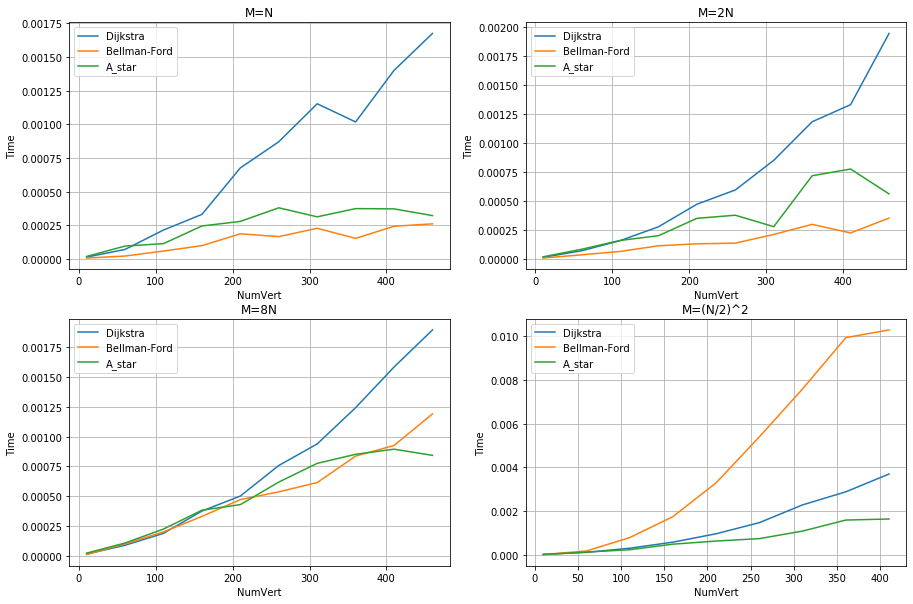

In [242]:
draw_results(d_b_a_undir)

In [168]:
d_b_dir = pd.read_csv("./data/d_b_dir.csv")
d_b_dir.head()

,NumVert,NumEdges,Dijkstra,Bellman-Ford
0,10,10,7000000.0,3000000.0
1,60,60,29000000.0,7000000.0
2,110,110,50000000.0,10000000.0
3,160,160,69000000.0,15000000.0
4,210,210,93000000.0,17000000.0


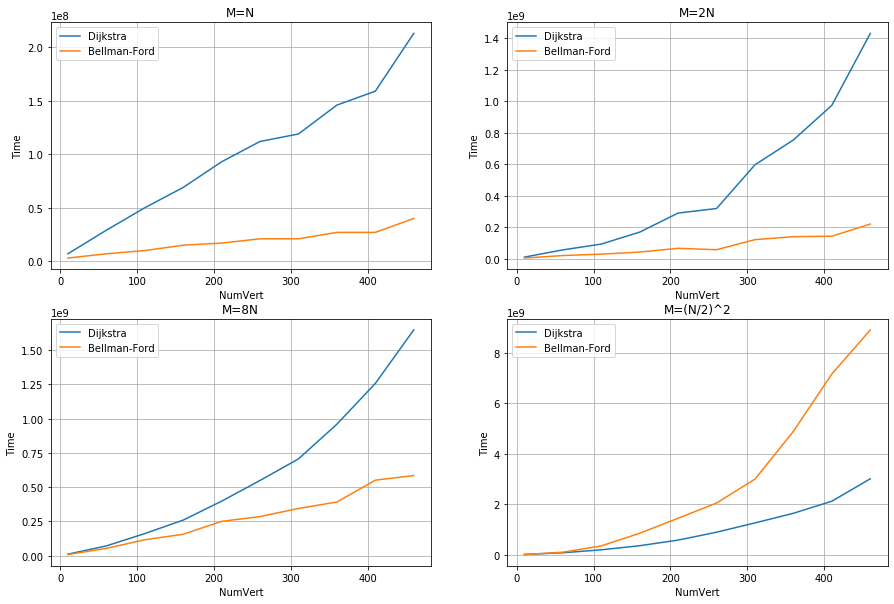

In [169]:
draw_results(d_b_dir)

In [170]:
undir_unweight = pd.read_csv("./data/undir_unweight.csv")
undir_unweight.head()

,NumVert,NumEdges,Johnson,Floyd-Warshall,Seidel
0,10,10,1.410000e+08,5.600000e+07,4.460000e+08
1,60,60,2.842000e+09,4.063000e+09,2.884500e+10
2,110,110,9.226000e+09,1.813400e+10,1.511360e+11
3,160,160,2.648600e+10,5.611100e+10,4.364680e+11
4,210,210,5.835900e+10,1.277610e+11,1.138490e+12


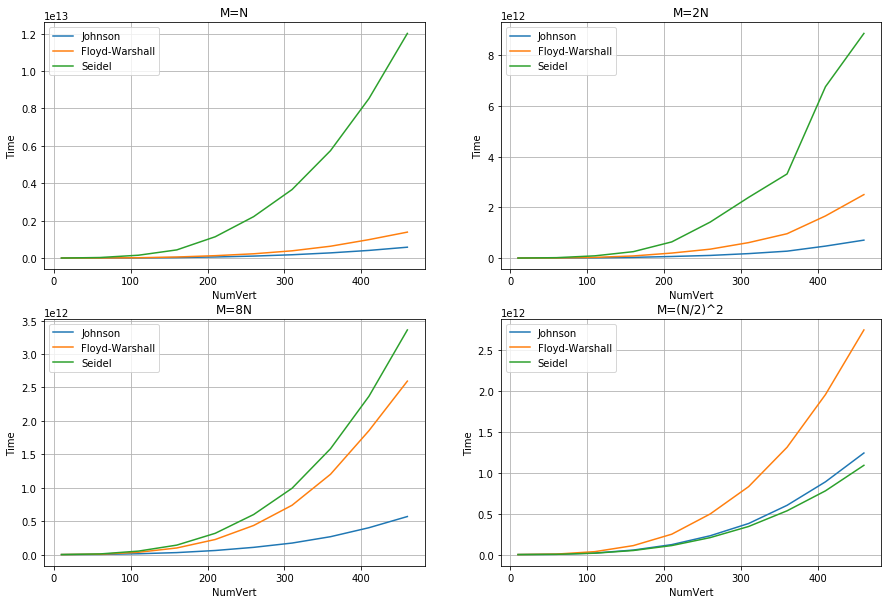

In [171]:
draw_results(undir_unweight)

In [188]:
undir_weight = pd.read_csv("./data/undir_weight.csv")
undir_weight.head()

,NumVert,NumEdges,Johnson,Floyd-Warshall
0,10,10,1.240000e+08,5.300000e+07
1,60,60,3.742000e+09,5.655000e+09
2,110,110,1.769500e+10,3.256000e+10
3,160,160,4.557800e+10,8.945500e+10
4,210,210,8.661800e+10,1.769280e+11


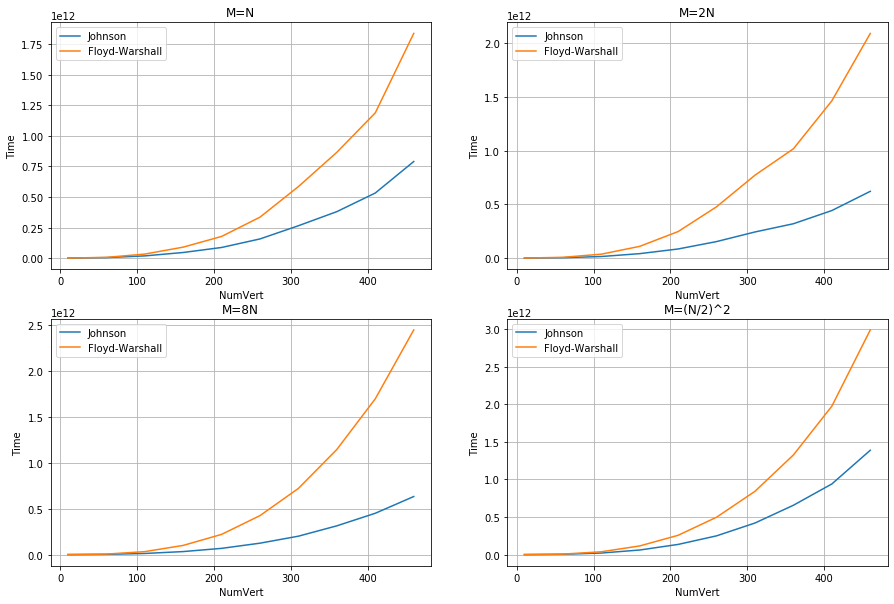

In [189]:
draw_results(undir_weight)

In [208]:
dir_negative_weight = pd.read_csv("./data/dir_negative_weight.csv")
dir_negative_weight.head()

,NumVert,NumEdges,Johnson,Floyd-Warshall
0,10,10,7.100000e+07,2.400000e+07
1,60,60,9.630000e+08,2.506000e+09
2,110,110,2.689000e+09,1.945400e+10
3,160,160,5.460000e+09,5.035800e+10
4,210,210,8.182000e+09,1.082990e+11


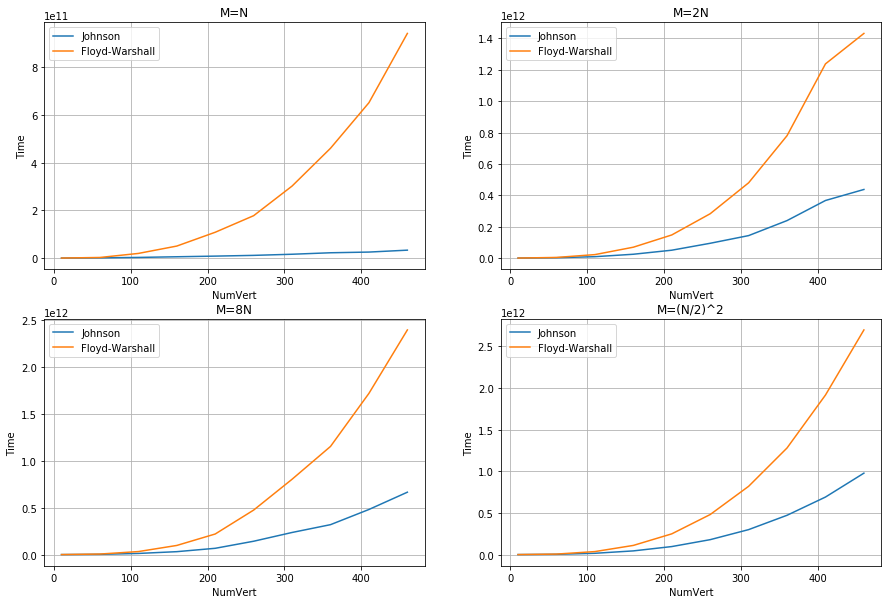

In [209]:
draw_results(dir_negative_weight)

### Real-life графы

Граф дорог города Олденбург. Источник: https://www.cs.utah.edu/~lifeifei/SpatialDataset.htm   
Преобразуем данные:

In [244]:
fil = open('./data/OL.cedge.txt')
odenb = fil.read()
odenb = odenb.split('\n')
for i in range(len(odenb)):
    odenb[i] = odenb[i].split(' ')  
max_vert = 0
with open('./data/Oldenburg.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for i in range(len(odenb)-1):
        if int(odenb[i][1]) < 100 and int(odenb[i][2]) < 100:
            max_vert = max(int(odenb[i][1]), int(odenb[i][2]), max_vert)
            writer.writerow([odenb[i][1], odenb[i][2], int(float(odenb[i][3]))])
        
max_vert

99

In [247]:
OL = pd.read_csv('./data/OL_graph_experiments.csv')
OL

,NumVert,NumEdges,Dijkstra,Bellman-Ford,Jonhson,Floyd-Warshall
0,100,111,0.000125,0.000047,0.005251,0.0181


<img src="./data/Снимок экрана 2020-05-02 в 12.33.51 AM.png" width="600" align="left">

Граф дорог штата Калифорния. Источник: https://www.cs.utah.edu/~lifeifei/SpatialDataset.htm   
Преобразуем данные:

In [246]:
fil = open('./data/california.txt')
clf = fil.read()
clf = clf.split('\n')
for i in range(len(clf)):
    clf[i] = clf[i].split(' ')  
max_vert = 0
with open('./data/California.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for i in range(len(clf)-1):
        if int(clf[i][1]) < 2000 and int(clf[i][2]) < 2000:
            max_vert = max(int(clf[i][1]), int(clf[i][2]), max_vert)
            writer.writerow([clf[i][1], clf[i][2], int(float(odenb[i][3]))])
max_vert

1999

In [249]:
CA = pd.read_csv('./data/CA_graph_experiments.csv')
CA

,NumVert,NumEdges,Dijkstra,Bellman-Ford,Jonhson,Floyd-Warshall
0,2000,2021,0.000999,0.000178,37.8074,154.748
